# Load packages and data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist

X, y = loadlocal_mnist(
        images_path='mnist_data/train-images.idx3-ubyte', 
        labels_path='mnist_data/train-labels.idx1-ubyte')

print(X.shape)
print(y.shape)

nb_classes = 10
targets = y.reshape(-1)
one_hot_targets = np.eye(nb_classes)[targets]

print(one_hot_targets.shape)

plt.imshow(X[0, :].reshape(28, 28), cmap='gray')
plt.show()

(60000, 784)
(60000,)
(60000, 10)


<Figure size 640x480 with 1 Axes>

# Initialize network architecture

In [3]:
lr = 0.001
inputs = 784
num_hidden = 100
outputs = 10

def sigmoid(x):
    return (1 + np.exp(-x))**-1

# One should do this numerically though and not use a function
# store num_activations
# gradients <- num_activations*(1-num_activations)
def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))

def loss(y, y_hat):
    return np.sum(np.square(y-y_hat))

# Create random input and output
batch_size = 1

#FIXME: transform data by normalizing it
# ie. divide by 255
y_k = one_hot_targets[0:batch_size, :].transpose()
x_i = X[0:batch_size, :].transpose() / 255
                     
w_ji = np.random.randn(num_hidden, inputs)
w_kj = np.random.randn(outputs, num_hidden)
b_j = np.matmul(w_ji, x_i)
V_j = sigmoid(b_j)
b_k = np.matmul(w_kj, V_j)
O_k = sigmoid(b_k)

# This function does not work then
def feed_forward(x_i):
    global b_j, V_j, b_k, O_k
    b_j = np.matmul(w_ji, x_i)
    V_j = sigmoid(b_j)
    b_k = np.matmul(w_kj, V_j)
    O_k = sigmoid(b_k)

feed_forward(x_i)

print("Input shape: ", x_i.shape)
print("First layer shape: ", w_ji.shape)
print("Hidden layer shape: ", V_j.shape)
print("Second layer shape: ", w_kj.shape)
print("Output shape: ", O_k.shape)

print("Ground truth shape: ", y_k.shape)

Input shape:  (784, 1)
First layer shape:  (100, 784)
Hidden layer shape:  (100, 1)
Second layer shape:  (10, 100)
Output shape:  (10, 1)
Ground truth shape:  (10, 1)


In [4]:
'''
Shape of neural network is
784 -> 100 -> 10

w_ji.shape = [784, 100]
w_kj.shape = [100, 10]

'''

# Errors for the output layer
delta_k = (y_k-O_k)*sigmoid_prime(b_k)
print("delta_k: ", delta_k.shape)

# The propagated error for the second weight matrix
delta_w_kj = np.matmul(delta_k, V_j.transpose())
print("update term second layer: ", delta_w_kj.shape)

# The propagated error for the first weightmatrix
DELTA_k = np.multiply(np.dot(delta_k.transpose(), w_kj), sigmoid_prime(b_j).transpose())
print("DELTA_k: ", DELTA_k.shape)
delta_w_ji = np.matmul(x_i, DELTA_k).transpose()
print("update term first layer: ", delta_w_ji.shape)

def backpropagation():
    global delta_k, delta_w_kj, DELTA_k, delta_w_ji, y_k, O_k
    # Second layer update term
    delta_k = (y_k-O_k)*sigmoid_prime(b_k)
    delta_w_kj = np.matmul(delta_k, V_j.transpose())
    # First layer update term
    DELTA_k = np.multiply(np.dot(delta_k.transpose(), w_kj), sigmoid_prime(b_j).transpose())
    delta_w_ji = np.matmul(x_i, DELTA_k).transpose()

def update_weights():
    global delta_w_kj, delta_w_ji, w_kj, w_ji
    w_ji = w_ji + lr*delta_w_ji
    w_kj = w_kj + lr*delta_w_kj


delta_k:  (10, 1)
update term second layer:  (10, 100)
DELTA_k:  (1, 100)
update term first layer:  (100, 784)


In [5]:
print("Loss value without training: ", loss(y_k, O_k))

Loss value without training:  4.262097969448646


In [6]:
# N - Number of training iterations
N = 5*60000
batch_size = 2

# Training loop
j = 0
for i in range(N):
    if i % 10000 == 0:
        print("Iteration: ", i)
    if j > 60000-1:
        j = 0
        
    feed_forward(X[j:(j+1), :].transpose())
    backpropagation()
    update_weights()
    j += 1

Iteration:  0
Iteration:  10000
Iteration:  20000
Iteration:  30000
Iteration:  40000
Iteration:  50000
Iteration:  60000
Iteration:  70000
Iteration:  80000
Iteration:  90000
Iteration:  100000
Iteration:  110000
Iteration:  120000
Iteration:  130000
Iteration:  140000
Iteration:  150000
Iteration:  160000
Iteration:  170000
Iteration:  180000
Iteration:  190000
Iteration:  200000
Iteration:  210000
Iteration:  220000
Iteration:  230000
Iteration:  240000
Iteration:  250000
Iteration:  260000
Iteration:  270000
Iteration:  280000
Iteration:  290000


[7.69634125e-06 9.96064957e-08 1.61733199e-04 3.90351644e-06
 4.28920275e-06 9.99949155e-01 4.67329766e-07 3.48391272e-06
 1.90834807e-04 1.32351083e-07]
6
1


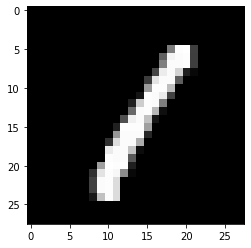

In [7]:
ind = 3
feed_forward(X[ind, :].transpose())
print(O_k)
print(np.argmax(O_k)+1)
print(targets[ind])
plt.imshow(X[ind, :].reshape(28, 28), cmap='gray')

# Neural network from Welchlabs

In [14]:
import sklearn.datasets as ds
import numpy as np
import matplotlib.pyplot as plt

data = ds.load_iris()
X = data['data']
y = data['target']
N = len(y)

rand_ind = np.random.choice(N, N, replace=False)

split = int(0.7*N)

train_X = X[rand_ind[0:split]]
train_y = np.expand_dims(y[rand_ind[0:split]], axis=1)

nb_classes = len(np.unique(y))
print(nb_classes)
targets = train_y.reshape(-1)
one_hot_train_y = np.eye(nb_classes)[targets]

test_X = X[rand_ind[split:]]
test_y = np.expand_dims(y[rand_ind[split:]], axis=1)
targets = test_y.reshape(-1)
one_hot_test_y = np.eye(nb_classes)[targets]

print(train_X.shape)
print(one_hot_train_y.shape)

print(test_X.shape)
print(one_hot_test_y.shape)

print(test_y)

3
(105, 4)
(105, 3)
(45, 4)
(45, 3)
[[0]
 [2]
 [2]
 [2]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [2]
 [0]
 [2]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [2]
 [0]
 [1]
 [0]
 [1]
 [0]
 [2]
 [0]
 [2]
 [1]
 [2]
 [1]
 [1]
 [0]
 [0]]


In [15]:
import numpy as np

class neural_network:
    def __init__(self, activation_function, derivative_act_func, input_size, num_classes):
        # Define hyper-parameters
        self.input_size = input_size
        self.hidden_layer_size = 100
        self.output_size = num_classes
        self.activation_function = activation_function
        self.derivative_act_func = derivative_act_func
        
        self.W1 = np.random.randn(self.input_size, self.hidden_layer_size)
        self.W2 = np.random.randn(self.hidden_layer_size, self.output_size)
    
    def forward(self, X):
        # Pass data through network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.activation_function(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yhat = self.activation_function(self.z3)
        return yhat
    
    def cost_function(self, X, y):
        self.yhat = self.forward(X)
        C = np.sum(0.5*(y-self.yhat)**2)
        return C
    
    def cost_function_prime(self, X, y):
        self.yhat = self.forward(X)
        delta3 = np.multiply(-(y-self.yhat), self.derivative_act_func(self.z3))
        dJdW2 = np.dot(self.a2.transpose(), delta3)
        
        delta2 = np.multiply(np.dot(delta3, self.W2.transpose()), self.derivative_act_func(self.z2))
        dJdW1 = np.dot(X.transpose(), delta2)
        return dJdW1, dJdW2
    
    def get_params(self):
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def set_params(self, params):
        W1_start = 0
        W1_end = self.input_size*self.hidden_layer_size
        self.W1 = params[W1_start:W1_end].reshape((self.input_size, self.hidden_layer_size))
        W2_end = W1_end + self.hidden_layer_size*self.output_size
        self.W2 = params[W1_end:W2_end].reshape((self.hidden_layer_size, self.output_size))
    
    def compute_gradients(self, X, y):
        dJdW1, dJdW2 = self.cost_function_prime(X, y)
        gradients = np.concatenate((dJdW1.ravel(), dJdW2.ravel()))
        return gradients

def sigmoid(X):
    return 1/(1 + np.exp(-X))

def sigmoid_prime(X):
    return sigmoid(X)*(1-sigmoid(X))

In [16]:
input_size = train_X.shape[1]
print(input_size)

nn = neural_network(sigmoid, sigmoid_prime, input_size, nb_classes)

ind = 1
X1, y1 = np.expand_dims(X[ind,:], axis=0), np.expand_dims(y[ind], axis=0)
nn.forward(X1)
result = nn.cost_function_prime(X1, y1)


4


In [17]:
def compute_numerical_gradient(N, X, y):
    params_initial = N.get_params()
    num_grad = np.zeros(params_initial.shape)
    perturb = np.zeros(params_initial.shape)
    p = 1e-4
    
    N.set_params(params_initial + p)
    grad1 = N.compute_gradients(X, y)
    N.set_params(params_initial - p)
    grad2 = N.compute_gradients(X, y)
    
    num_grad = (grad1-grad2)/2
    return num_grad

def compute_numerical_gradient(N, X, y):
        paramsInitial = N.get_params()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.set_params(paramsInitial + perturb)
            loss2 = N.cost_function(X, y)
            
            N.set_params(paramsInitial - perturb)
            loss1 = N.cost_function(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.set_params(paramsInitial)

        return numgrad 

num_grad = compute_numerical_gradient(nn, X1, y1)
grad = nn.compute_gradients(X1, y1)
norm = np.linalg.norm

print(norm(grad-num_grad)/norm(grad+num_grad))

4.9579962154585615e-09


# Which means it seems to work?

In [18]:
from scipy import optimize

class trainer:
    def __init__(self, N):
        # N denotes neural network
        self.N = N
    
    def callback_f(self, params):
        self.N.set_params(params)
        self.J.append(self.N.cost_function(self.X, self.y))
    
    def cost_function_wrapper(self, params, X, y):
        self.N.set_params(params)
        cost = self.N.cost_function(X, y)
        grad = self.N.compute_gradients(X, y)
        return cost, grad
    
    def train(self, X, y):
        # Variables X and y which the callback will reference
        self.X = X
        self.y = y
        
        # Keeping track of the cost function
        self.J = []
        params0 = self.N.get_params()
        
        options = {'maxiter': 100, 'disp' : True}
        _res = optimize.minimize(self.cost_function_wrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callback_f)

        self.N.set_params(_res.x)
        self.optimizationResults = _res

In [19]:
T = trainer(nn)
T

Optimization terminated successfully.
         Current function value: 1.000000
         Iterations: 92
         Function evaluations: 113
         Gradient evaluations: 113


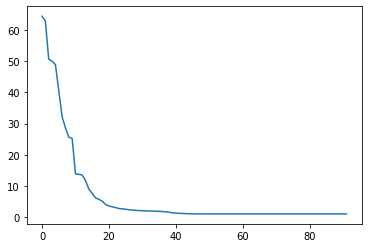

In [20]:
T.train(train_X, one_hot_train_y)

plt.plot(T.J)
plt.show()

In [45]:
yhat_ohe = T.N.forward(test_X)
yhat = np.argmax(yhat_ohe, axis=1)

correctly_classified = yhat == test_y.squeeze()

acc = np.sum(correctly_classified)/len(correctly_classified)
print(acc)

1.0
